<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [7]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [11]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


Text(0.5, 1.0, 'Normal Homes Median')

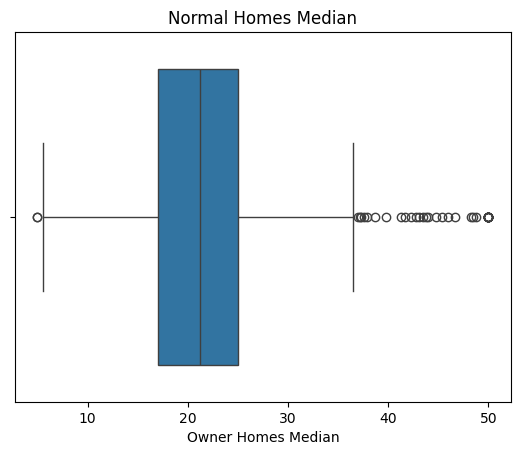

In [25]:
box1= sns.boxplot(x='MEDV',data=boston_df)
box1.set_xlabel("Owner Homes Median")
box1.set_title("Normal Homes Median")

In [27]:
boston_df.loc[boston_df["AGE"]<=35,'AgeGroup']='<35 Years'
boston_df.loc[(boston_df["AGE"]>35) & (boston_df["AGE"]<70),'AgeGroup']='35 Years < 70 Years'
boston_df.loc[boston_df["AGE"]>70,'AgeGroup']='> 70 years'

Text(0.5, 1.0, 'Built after 1940 Homes')

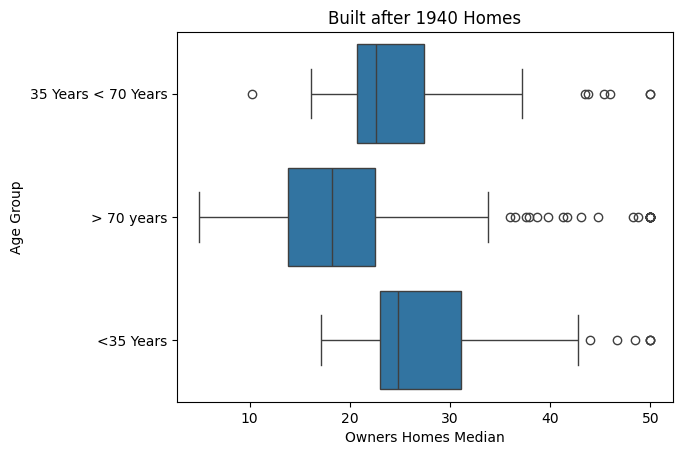

In [28]:
box2=sns.boxplot(x="MEDV",y="AgeGroup",data=boston_df)
box2.set_xlabel("Owners Homes Median")
box2.set_ylabel("Age Group")
box2.set_title("Built after 1940 Homes")

Text(0.5, 1.0, 'Industrial Acres Per Town vs NOX Concentrations')

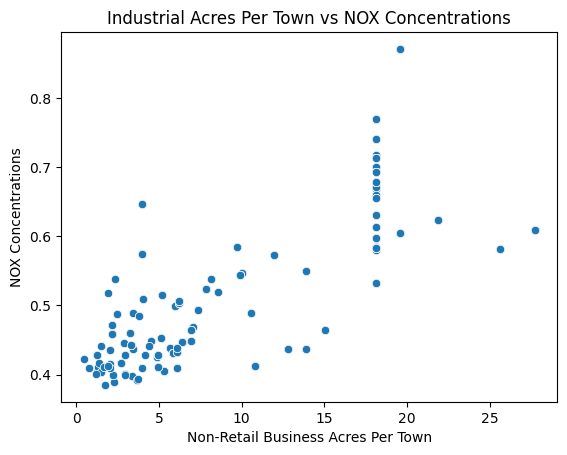

In [29]:
scatter=sns.scatterplot(x="INDUS",y="NOX",data=boston_df)
scatter.set_ylabel("NOX Concentrations")
scatter.set_xlabel("Non-Retail Business Acres Per Town")
scatter.set_title("Industrial Acres Per Town vs NOX Concentrations")

Text(0.5, 1.0, 'Distribution of Pupil to Teacher Ratio')

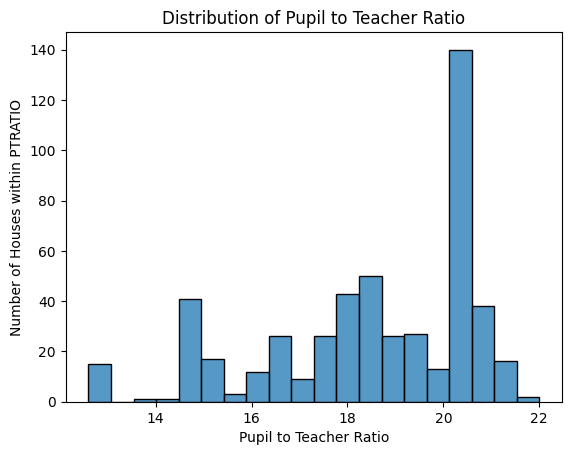

In [30]:
hist=sns.histplot(x="PTRATIO",bins=20,data=boston_df)
hist.set_xlabel("Pupil to Teacher Ratio")
hist.set_ylabel("Number of Houses within PTRATIO")
hist.set_title("Distribution of Pupil to Teacher Ratio")

In [19]:
scipy.stats.levene(
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'],
    center='median'
)

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [33]:
thirtyfive=boston_df[boston_df['AgeGroup']=='35 years and below']['MEDV']
between=boston_df[boston_df['AgeGroup']=='Between 35 and 70 years']['MEDV']
seventy=boston_df[boston_df['AgeGroup']=='Above 70 years']['MEDV']

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [36]:
X=boston_df['DIS']
X=sm.add_constant(X)
Y=boston_df['MEDV']
lm=sm.OLS(Y,X).fit()
lm.predict()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 14 Feb 2025   Prob (F-statistic):           1.21e-08
Time:                        16:48:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""